In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
# Specify the path to the folder
folder_path = 'C:/Users/mariem hssn/OneDrive/Bureau/Classification of agricultural crop images/dataset'

# List all files in the folder
files = os.listdir(folder_path)

# Display the list of files
files

['Crop_details.csv',
 'crop_images',
 'kag2',
 'some_more_images',
 'test_crop_image']

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train_data_dir ='C:/Users/mariem hssn/OneDrive/Bureau/Classification of agricultural crop images/dataset/kag2'
validation_data_dir='C:/Users/mariem hssn/OneDrive/Bureau/Classification of agricultural crop images/dataset/some_more_images/some_more_images'
test_data_dir='C:/Users/mariem hssn/OneDrive/Bureau/Classification of agricultural crop images/dataset/test_crop_image'

image_width, image_height=224,224
batch_size=16

datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode = 'categorical'
)
validation_generator=datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode = 'categorical'
)
test_generator=datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode = 'categorical'
)

Found 804 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 45 images belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D (2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
history =model. fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
50/50 [==============================] - 70s 1s/step - loss: 1.7076 - accuracy: 0.2195 - val_loss: 1.7545 - val_accuracy: 0.1250
Epoch 2/10
50/50 [==============================] - 68s 1s/step - loss: 1.3877 - accuracy: 0.4226 - val_loss: 2.3712 - val_accuracy: 0.0417
Epoch 3/10
50/50 [==============================] - 74s 1s/step - loss: 1.1346 - accuracy: 0.5508 - val_loss: 3.8979 - val_accuracy: 0.0833
Epoch 4/10
50/50 [==============================] - 65s 1s/step - loss: 0.8305 - accuracy: 0.6992 - val_loss: 4.3332 - val_accuracy: 0.0833
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.6026 - accuracy: 0.7919 - val_loss: 5.7978 - val_accuracy: 0.0833
Epoch 6/10
50/50 [==============================] - 69s 1s/step - loss: 0.4135 - accuracy: 0.8629 - val_loss: 8.1150 - val_accuracy: 0.1042
Epoch 7/10
50/50 [==============================] - 59s 1s/step - loss: 0.2715 - accuracy: 0.9124 - val_loss: 7.5893 - val_accuracy: 0.0833
Epoch 8/10
50/50 [==

3/3 [==============================] - 1s 439ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.12      0.29      0.17         7
           2       0.20      0.12      0.15         8
           3       0.00      0.00      0.00         8
           4       0.25      0.31      0.28        13

    accuracy                           0.22        45
   macro avg       0.21      0.21      0.20        45
weighted avg       0.23      0.22      0.21        45



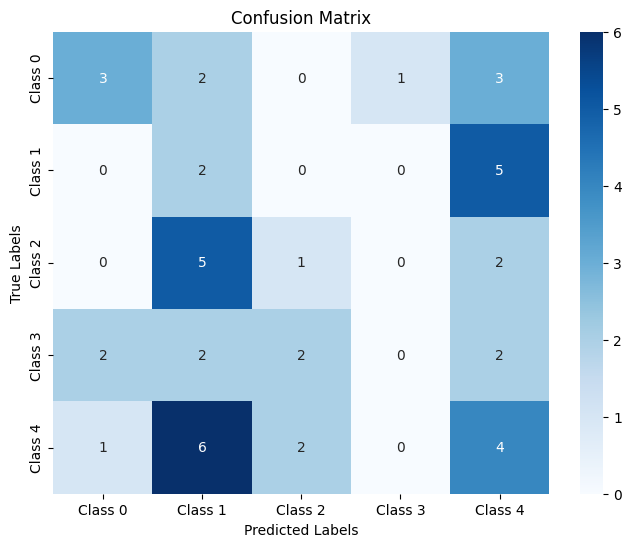

In [6]:

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

# Make predictions using the provided model and generator
predictions = model.predict(test_generator)

# Get true labels from the generator
true_labels = test_generator.classes

# Predicted labels are the argmax of the predictions along axis 1
predicted_labels = np.argmax(predictions, axis=1)

# Display classification report
print(f"Classification Report:\n{classification_report(true_labels, predicted_labels)}")

# Display colored confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from  tensorflow.keras.applications import ResNet50 ,InceptionV3 ,VGG16
from tensorflow.keras import layers , models

base_model_vgg=VGG16(weights='imagenet' ,include_top =False , input_shape=(224,224,3))

for layer in base_model_vgg.layers:
  layer.trainable =False

model_vgg = models.Sequential( [
      base_model_vgg ,
      layers.GlobalAveragePooling2D(),
      layers.Dense(256, activation ='relu'),
      layers.Dropout(0.5),
      layers.Dense(5,activation ='softmax')
   ]
)

In [11]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_vgg .fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
50/50 [==============================] - 265s 5s/step - loss: 1.5796 - accuracy: 0.3122 - val_loss: 1.6329 - val_accuracy: 0.1250
Epoch 2/10
39/50 [======================>.......] - ETA: 52s - loss: 1.3790 - accuracy: 0.4118

In [ ]:

# Make predictions using the provided model and generator
predictions = model_vgg.predict(test_generator)

# Get true labels from the generator
true_labels = test_generator.classes

# Predicted labels are the argmax of the predictions along axis 1
predicted_labels = np.argmax(predictions, axis=1)

# Display classification report
print(f"Classification Report:\n{classification_report(true_labels, predicted_labels)}")

# Display colored confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
base_model_inception= InceptionV3(weights='imagenet', include_top=False,input_shape=(224,224,3))
for layer in base_model_inception.layers:
  layer.trainable=False
model_inception = models.Sequential([

 base_model_inception,
 layers.GlobalAveragePooling2D(),
 layers.Dense(256,activation='relu'),
 layers.Dropout(0.5),
 layers.Dense(5,activation='softmax')

])

In [ ]:
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_inception .fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

In [ ]:
# Make predictions using the provided model and generator
predictions = model_inception.predict(test_generator)

# Get true labels from the generator
true_labels = test_generator.classes

# Predicted labels are the argmax of the predictions along axis 1
predicted_labels = np.argmax(predictions, axis=1)

# Display classification report
print(f"Classification Report:\n{classification_report(true_labels, predicted_labels)}")

# Display colored confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump(model_vgg, 'model_vgg.joblib')
joblib.dump(model_inception,'model_inception.joblib')
joblib.dump(model_resnet,'model_resnet.joblib')

In [ ]:
loaded_model_vgg = joblib.load('model_vgg.joblib')
loaded_model_inception = joblib.load('model_inception.joblib')
loaded_model_resnet = joblib.load('model_resnet.joblib')

image_path = '/content/data_folder/test_crop_image/jute-field.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.


predictions_vgg = loaded_model_vgg.predict(img_array)
predictions_resnet = loaded_model_resnet.predict(img_array)
predictions_inception = loaded_model_inception.predict(img_array)
final_predictions = np.argmax(predictions_vgg + predictions_inception + predictions_resnet, axis=1)
print(f"Predicted class: {final_predictions[0]}")